------------
# Task a
----------

In [1]:
import csv

def load_data(filepath):
    with open(filepath, mode='r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        return [row for row in csv_reader]

def find_by_oem_id(data, oem_id):
    return [device for device in data if device['oem_id'] == oem_id]

def find_by_codename(data, codename):
    return [device for device in data if device['codename'] == codename]

def find_by_ram_capacity(data, ram_capacity):
    return [device for device in data if device['ram_capacity'] == ram_capacity]

def custom_query(data, column, condition):
    return [device for device in data if device[column] == condition]

def main():
    filepath = input("Enter the path to the CSV file: ")
    data = load_data(filepath)

    while True:
        print("\nChoose an option:")
        print("1. Find by OEM ID")
        print("2. Find by Code Name")
        print("3. Find by RAM Capacity")
        print("4. Custom Query")
        print("5. Exit")
        choice = input("> ")

        if choice == "1":
            oem_id = input("Enter OEM ID for the query: ")
            for device in find_by_oem_id(data, oem_id):
                print(f"Model: {device['model']}, Manufacturer: {device['manufacturer']}, Weight: {device['weight_gram']}, Price: {device['price']}, Price Currency: {device['price_currency']}")
        elif choice == "2":
            codename = input("Enter device code name for the query: ")
            for device in find_by_codename(data, codename):
                print(f"Brand: {device['brand']}, Model: {device['model']}, RAM: {device['ram_capacity']}, Market Regions: {device['market_regions']}, Info Added Date: {device['info_added_date']}")
        elif choice == "3":
            ram_capacity = input("Enter RAM capacity for the query: ")
            for device in find_by_ram_capacity(data, ram_capacity):
                print(f"OEM ID: {device['oem_id']}, Release Date: {device['released_date']}, Announcement Date: {device['announced_date']}, Dimensions: {device['dimensions']}, Category: {device['device_category']}")
        elif choice == "4":
            custom_column = input("Enter the column name for the custom query: ")
            condition = input("Enter the condition for the custom query: ")
            custom_devices = custom_query(data, custom_column, condition)
            for device in custom_devices:
                print(f"Model: {device['model']}, Weight: {device['weight_gram']}, Battery: {device['battery_capacity']}")
        elif choice == "5":
            break
        else:
            print("Invalid choice. Please try again.")


if __name__ == "__main__":
    main()


Enter the path to the CSV file: 3


FileNotFoundError: [Errno 2] No such file or directory: '3'

------------
# Task b
----------

In [15]:
import pandas as pd

def top_regions_for_brand(data, brand):
    filtered_data = data[data['brand'] == brand]
    top_regions = filtered_data['market_regions'].str.split(',', expand=True).stack().value_counts().head(5)
    return top_regions

def average_price_for_brand(data, brand):
    brand_data = data[data['brand'] == brand]
    return brand_data['price'].mean()

def average_mass_by_manufacturer(data):
    return data.groupby('manufacturer')['weight_gram'].mean()

def price_battery_analysis(data):
    return data.groupby('battery_capacity')['price'].mean()

def main():
    file_path = input("Enter the path to the CSV file: ")
    data = pd.read_csv(file_path)

    while True:
        print("\nSelect an option:")
        print("1. Identify top 5 regions for a specific brand")
        print("2. Analyse average price for a specific brand")
        print("3. Analyse average mass for each manufacturer")
        print("4. Analyse relationship between price and battery capacity")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ")

        if choice == "1":
            brand_name = input("Enter the brand name for top regions analysis: ")
            print("Top 5 regions for brand", brand_name)
            print(top_regions_for_brand(data, brand_name))

        elif choice == "2":
            brand_for_price = input("Enter the brand name for average price analysis: ")
            print("Average price for brand", brand_for_price)
            print(average_price_for_brand(data, brand_for_price))

        elif choice == "3":
            print("Average mass for each manufacturer:")
            print(average_mass_by_manufacturer(data))

        elif choice == "4":
            print("Average price for each battery capacity:")
            print(price_battery_analysis(data))

        elif choice == "5":
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 5.")

if __name__ == "__main__":
    main()


Enter the path to the CSV file: C:\Users\DELL\Downloads\office\03.01.2024\1\device_features.csv

Select an option:
1. Identify top 5 regions for a specific brand
2. Analyse average price for a specific brand
3. Analyse average mass for each manufacturer
4. Analyse relationship between price and battery capacity
5. Exit
Enter your choice (1-5): 1
Enter the brand name for top regions analysis: Samsung
Top 5 regions for brand Samsung
North America     341
Asia              264
Southeast Asia    131
Europe            104
Eastern Europe    102
Name: count, dtype: int64

Select an option:
1. Identify top 5 regions for a specific brand
2. Analyse average price for a specific brand
3. Analyse average mass for each manufacturer
4. Analyse relationship between price and battery capacity
5. Exit
Enter your choice (1-5): 2
Enter the brand name for average price analysis: Samsung
Average price for brand Samsung
199633.84642384108

Select an option:
1. Identify top 5 regions for a specific brand
2. 

KeyboardInterrupt: Interrupted by user

------------
# Task c
----------

Enter the path to the CSV file: C:\Users\DELL\Downloads\office\03.01.2024\1\device_features.csv

Select an option:
1. Visualise RAM Type Proportion
2. Compare USB Connector Types
3. Monthly Average Price Trends
4. Custom Visualisation
5. Exit
Enter your choice (1-5): 4
Available columns for visualization: ['weight_gram', 'battery_capacity', 'price', ...]
Enter the column you want to visualize: price
Select the type of plot:
1. Histogram
2. Box plot
3. Density plot
Enter your choice (1/2/3): 1


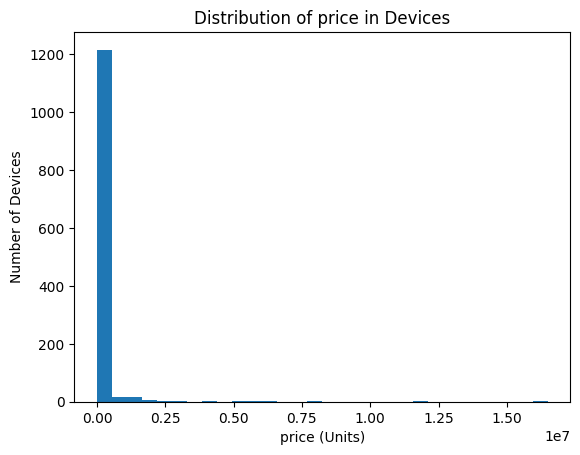


Select an option:
1. Visualise RAM Type Proportion
2. Compare USB Connector Types
3. Monthly Average Price Trends
4. Custom Visualisation
5. Exit
Enter your choice (1-5): 4
Available columns for visualization: ['weight_gram', 'battery_capacity', 'price', ...]
Enter the column you want to visualize: weight_gram
Select the type of plot:
1. Histogram
2. Box plot
3. Density plot
Enter your choice (1/2/3): 3


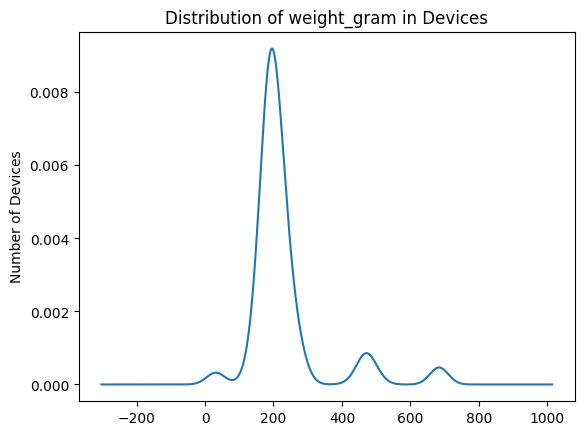


Select an option:
1. Visualise RAM Type Proportion
2. Compare USB Connector Types
3. Monthly Average Price Trends
4. Custom Visualisation
5. Exit
Enter your choice (1-5): 5
Exiting the program.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def ram_type_proportion(data):
    ram_counts = data['ram_type'].value_counts()
    ram_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Proportion of RAM Types in Devices')
    plt.ylabel('')  # Hiding the y-label
    plt.show()

def usb_connector_type_comparison(data):
    usb_counts = data['usb_connector'].value_counts()
    usb_counts.plot(kind='bar')
    plt.title('Number of Devices per USB Connector Type')
    plt.xlabel('USB Connector Type')
    plt.ylabel('Number of Devices')
    plt.show()

def average_price_trends(data, year):
    data['released_date'] = pd.to_datetime(data['released_date'])
    yearly_data = data[data['released_date'].dt.year == year]
    monthly_avg = yearly_data.groupby(yearly_data['released_date'].dt.month)['price'].mean()
    monthly_avg.plot(kind='line')
    plt.title(f'Monthly Average Price Trend for Devices Released in {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Price (GBP)')
    plt.show()

def custom_visualisation(data):
    # Let the user choose a column for visualization
    print("Available columns for visualization: ['weight_gram', 'battery_capacity', 'price', ...]")
    column_choice = input("Enter the column you want to visualize: ")

    # Check if the chosen column exists in the data
    if column_choice in data.columns:
        # Convert the chosen column to numeric, handling non-numeric entries
        data[column_choice] = pd.to_numeric(data[column_choice], errors='coerce')

        # Ask user for the type of plot
        print("Select the type of plot:")
        print("1. Histogram")
        print("2. Box plot")
        print("3. Density plot")
        plot_choice = input("Enter your choice (1/2/3): ")

        # Plot based on user choice
        if plot_choice == '1':
            data[column_choice].plot(kind='hist', bins=30)
            plt.xlabel(f'{column_choice} (Units)')
        elif plot_choice == '2':
            data[column_choice].plot(kind='box')
        elif plot_choice == '3':
            data[column_choice].plot(kind='density')
        else:
            print("Invalid choice. Defaulting to histogram.")
            data[column_choice].plot(kind='hist', bins=30)
            plt.xlabel(f'{column_choice} (Units)')

        # Common plot settings
        plt.title(f'Distribution of {column_choice} in Devices')
        plt.ylabel('Number of Devices')
        plt.show()
    else:
        print(f"Column '{column_choice}' not found in the data.")

def main():
    file_path = input("Enter the path to the CSV file: ")
    data = pd.read_csv(file_path)

    while True:
        print("\nSelect an option:")
        print("1. Visualise RAM Type Proportion")
        print("2. Compare USB Connector Types")
        print("3. Monthly Average Price Trends")
        print("4. Custom Visualisation")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ")

        if choice == "1":
            ram_type_proportion(data)

        elif choice == "2":
            usb_connector_type_comparison(data)

        elif choice == "3":
            for year in range(2020, 2024):
                average_price_trends(data, year)

        elif choice == "4":
            custom_visualisation(data)

        elif choice == "5":
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 5.")

if __name__ == "__main__":
    main()
